In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Vertex Count

    In this script I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT with a rate of 0.0125 mT/s (2000 s) and then maintant the magnetic field constant until 2500 s. Then, we are analyzing the output data of Script-7.0.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-7.0"

In [3]:
slope = 25/2000
slope

0.0125

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2500s_Bistability_l*_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2500s_Bistability_l10_exp7.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp9.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp0.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp1.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp2.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp3.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp6.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp5.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp4.dat
ACI_CairoLattice_25mT-2500s_Bistability_l10_exp8.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

    I will remove the vertices of the last shell

In [8]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [9]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4      -2  1.000000   
           28    704.625685 -417.196014             3      -1 -1.000000   
           47    440.070723 -115.898809             4       0  0.000000   
           48    347.420541 -115.904316             4       2 -1.732051   
           49    324.265015 -102.505692             3       3  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1199  426.684724 -602.604004             3      -1 -1.000000   
           1200  416.911987 -566.024860             3      -1 -1.732051   
           1202  175.521088  -92.704002             3       1 -1.000000   
           1203  195.066852  -92.704002             3      -1 -1.000000   
           1205  787.500000 -731.857662             3       1  0.000000   

                           dy    type  
Exp frame  id                          
0   0      25   -1.732051e+00  Q = -2  
           28   -1.732051e+00  Q = -1  
           47    0.000000e+00   Q = 0  
           48    1.000000e+00  Q = +2  
           49    3.747952e-07  Q = +3  
...                       ...     ...  
9   250000 1199  1.732051e+00  Q = -1  
           1200  1.000000e+00  Q = -1  
           1202 -1.732051e+00  Q = +1  
           1203  1.732051e+00  Q = -1  
           1205 -2.000000e+00  Q = +1  

[1696760 rows x 7 columns]

In [10]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [11]:
Cairo_exp['field'] = Cairo_exp.index.get_level_values('frame')
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4      -2  1.000000   
           28    704.625685 -417.196014             3      -1 -1.000000   
           47    440.070723 -115.898809             4       0  0.000000   
           48    347.420541 -115.904316             4       2 -1.732051   
           49    324.265015 -102.505692             3       3  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1199  426.684724 -602.604004             3      -1 -1.000000   
           1200  416.911987 -566.024860             3      -1 -1.732051   
           1202  175.521088  -92.704002             3       1 -1.000000   
           1203  195.066852  -92.704002             3      -1 -1.000000   
           1205  787.500000 -731.857662             3       1  0.000000   

                           dy    type  mean   field  
Exp frame  id                                        
0   0      25   -1.732051e+00  Q = -2     0       0  
           28   -1.732051e+00  Q = -1     0       0  
           47    0.000000e+00   Q = 0     0       0  
           48    1.000000e+00  Q = +2     0       0  
           49    3.747952e-07  Q = +3     0       0  
...                       ...     ...   ...     ...  
9   250000 1199  1.732051e+00  Q = -1     0  250000  
           1200  1.000000e+00  Q = -1     0  250000  
           1202 -1.732051e+00  Q = +1     0  250000  
           1203  1.732051e+00  Q = -1     0  250000  
           1205 -2.000000e+00  Q = +1     0  250000  

[1696760 rows x 9 columns]

In [12]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
count_m

coordination  field   mean
Exp field  coordination type                              
0   0      3            Q = +1           0.0    0.0  163.0
                        Q = +2           0.0    0.0    0.0
                        Q = +3           0.0    0.0   61.0
                        Q = +4           0.0    0.0    0.0
                        Q = -1           0.0    0.0  167.0
...                                      ...    ...    ...
9   250000 4            Q = -1           0.0    0.0    0.0
                        Q = -2           0.0    0.0    5.0
                        Q = -3           0.0    0.0    0.0
                        Q = -4           0.0    0.0    0.0
                        Q = 0            0.0    0.0  191.0

[45180 rows x 3 columns]

In [13]:
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [14]:
a = increase.query('mean != 0')
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field  type            
0   0      Q = +1  0.361419
           Q = +3  0.135255
           Q = -1  0.370288
           Q = -3  0.133038
           Q = +2  0.248889
...                     ...
9   250000 Q = +3  0.002217
           Q = -1  0.558758
           Q = +2  0.128889
           Q = -2  0.022222
           Q = 0   0.848889

[19759 rows x 1 columns]

In [15]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [16]:
field = np.linspace(0,250000,75)


vert_prop_evenspace_m = a.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [17]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [22]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"]) 

In [23]:
v_counts_m['time'] = v_counts_m.index.get_level_values('field')/100

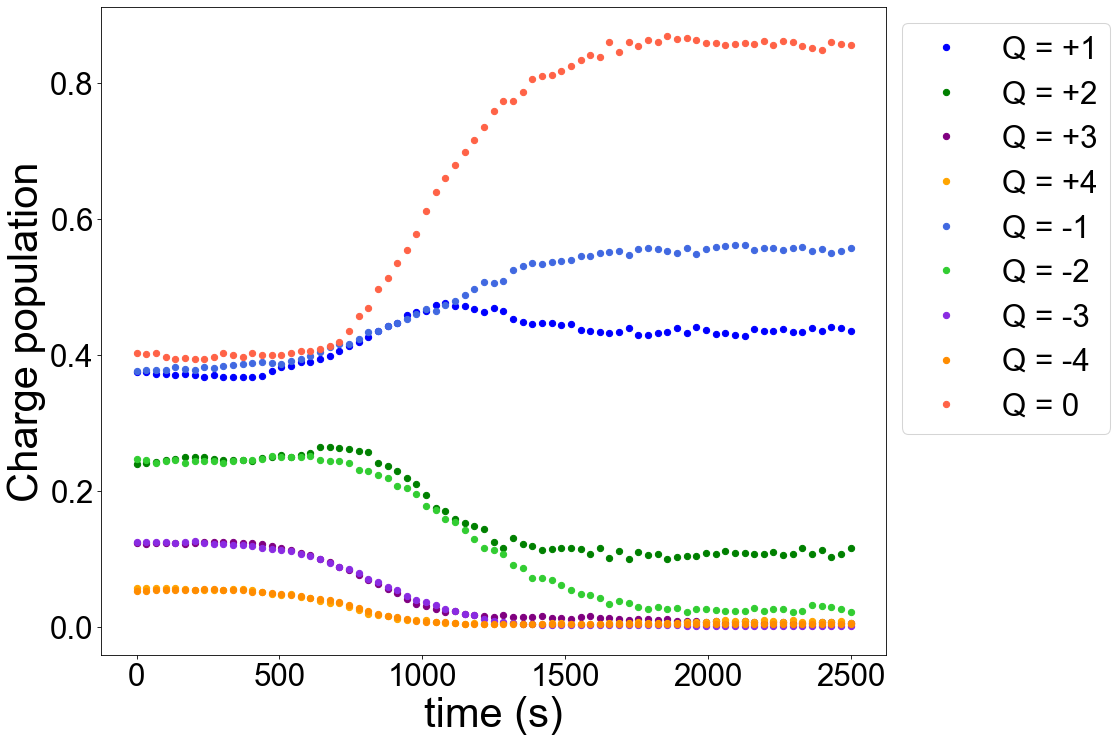

In [24]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m.groupby('type'):
    
    plt.plot(mtype['time'], mtype["mean"], 'o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()

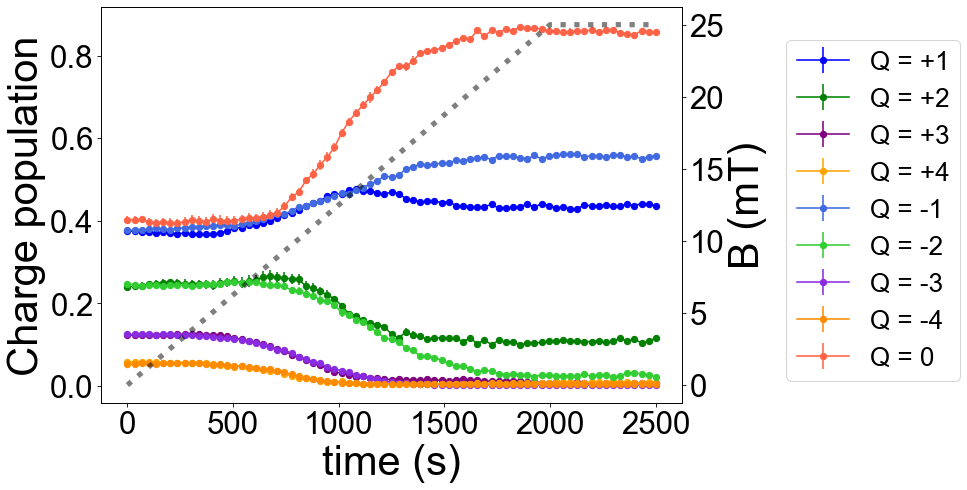

In [30]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

plt.show()

    Now, I will check the magnetic field applied

In [30]:
import sys
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

In [31]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "ACI_CairoLattice_l7_25mT-2000s_ramp+cte.lammpstrj"):
        print(file)
        load_obj = mgc.trj_lazyread(os.path.join(data_directory,file),
                                                    output = ["x","y","z","mux","muy","muz"]) 
        bnd = load_obj.get_bounds()
        trj = load_obj.read_trj()
    
        Cairo.append(trj)
        
    
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_l7_25mT-2000s_ramp+cte.lammpstrj


In [32]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)
Cairo_exp.index.names = ['Exp', 'frame', 'id']
Cairo_exp

type           x           y    z     mux     muy  muz
Exp frame  id                                                          
0   0      1        1   -2.262900    0.000000  0.0  0.0000  0.0000  0.0
           2        1  -13.546100    6.535400  0.0  0.0000  0.0000  0.0
           3        1  -15.195700   27.805901  0.0  0.0000  0.0000  0.0
           4        1   15.195700   27.805901  0.0  0.0000  0.0000  0.0
           5        1   18.546101   15.195700  0.0  0.0000  0.0000  0.0
...               ...         ...         ...  ...     ...     ...  ...
    250000 1956     3  509.558990 -556.252014  0.0  0.0000  4.5258  0.0
           1957     3  555.882996 -556.223999  0.0  4.5258 -0.0000 -0.0
           1958     3  555.882996 -509.872009  0.0 -0.0000 -4.5258 -0.0
           1959     3  602.205994 -602.604004  0.0 -4.5258  0.0000  0.0
           1960     3  602.205994 -556.252014  0.0  0.0000  4.5258  0.0

[4901960 rows x 7 columns]

In [33]:
particles = Cairo_exp.query('type == 1')

In [34]:
particles

type           x           y    z  mux  muy       muz
Exp frame  id                                                        
0   0      1       1   -2.262900    0.000000  0.0  0.0  0.0  0.000000
           2       1  -13.546100    6.535400  0.0  0.0  0.0  0.000000
           3       1  -15.195700   27.805901  0.0  0.0  0.0  0.000000
           4       1   15.195700   27.805901  0.0  0.0  0.0  0.000000
           5       1   18.546101   15.195700  0.0  0.0  0.0  0.000000
...              ...         ...         ...  ...  ...  ...       ...
    250000 976     1  620.526001 -617.956970  0.0  0.0  0.0  0.000174
           977     1  641.943970 -588.895020  0.0  0.0  0.0  0.000174
           978     1  635.348999 -562.622986  0.0  0.0  0.0  0.000174
           979     1  617.653992 -537.591003  0.0  0.0  0.0  0.000174
           980     1  601.960022 -554.231018  0.0  0.0  0.0  0.000174

[2450980 rows x 7 columns]

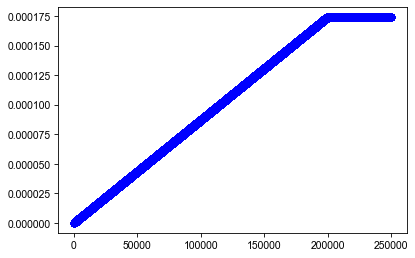

In [35]:
plt.plot(particles.index.get_level_values('frame'), particles.muz, 'o')